MERGE SORT VS MODIFIED MERGE SORT

10,50 ,100,1000,10000 running time for all problem with different data size , no of recusion calls , no of entries into dp table find the test case for all the three solution , where top down approuch works best. find the test case where bottom up works better compare the efficency wrt to dp table entry

In [1]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd
import sys


In [2]:
Total_execution = [0,0,0,0,0,0]
No_recursion = [0,0,0,0,0,0]
No_entries = [0,0,0,0,0,0]
space = [0,0,0,0,0,0]
swaps = 0
comparisons = 0


In [3]:
mergesort_swaps = 0
mergesort_comparisons = 0
def mergesort(arr, low, high):
    global mergesort_swaps, mergesort_comparisons

    if low < high:
        mid = (low + high) // 2
        mergesort(arr, low, mid)
        mergesort(arr, mid + 1, high)
        merge(arr, low, mid, high)
    


In [4]:
def merge(arr, low, mid, high):
    global mergesort_swaps, mergesort_comparisons  # Use global variables
    temp = []
    left = low
    right = mid + 1
    while left <= mid and right <= high:
        mergesort_comparisons += 1  # Increment comparisons count
        if arr[left] < arr[right]:
            temp.append(arr[left])
            left += 1
        else:
            temp.append(arr[right])
            right += 1
    while left <= mid:
        temp.append(arr[left])
        left += 1
    while right <= high:
        temp.append(arr[right])
        right += 1
    for i in range(low, high + 1):
        arr[i] = temp[i - low]
        mergesort_swaps += 1  # Increment swaps count

In [ ]:
import time

# Recursive Algorithm
def matrix_chain_recursive(p, i, j, calls=0):
    calls += 1
    if i == j:
        return 0, calls
    min_cost = float('inf')
    for k in range(i, j):
        cost, calls = matrix_chain_recursive(p, i, k, calls)
        cost2, calls = matrix_chain_recursive(p, k + 1, j, calls)
        calls += 1
        cost += cost2 + p[i-1] * p[k] * p[j]
        if cost < min_cost:
            min_cost = cost
    return min_cost, calls

# Recursive with Memoization
def matrix_chain_memoization(p):
    n = len(p) - 1
    memo = [[-1 for _ in range(n)] for _ in range(n)]

    def helper(i, j, calls=0):
        calls += 1
        if i == j:
            return 0, calls
        if memo[i][j] != -1:
            return memo[i][j], calls
        min_cost = float('inf')
        for k in range(i, j):
            cost, calls = helper(i, k, calls)
            cost2, calls = helper(k + 1, j, calls)
            calls += 1
            cost += cost2 + p[i-1] * p[k] * p[j]
            if cost < min_cost:
                min_cost = cost
        memo[i][j] = min_cost
        return min_cost, calls

# Bottom-Up DP
def matrix_chain_bottom_up(p):
    n = len(p) - 1
    dp = [[0 for _ in range(n)] for _ in range(n)]
    calls = 0

    for chain_length in range(2, n+1):
        for i in range(1, n - chain_length + 2):
            j = i + chain_length - 1
            dp[i-1][j-1] = float('inf')
            for k in range(i, j):
                cost = dp[i-1][k-1] + dp[k][j-1] + p[i-1] * p[k] * p[j]
                if cost < dp[i-1][j-1]:
                    dp[i-1][j-1] = cost
                calls += 1

    return dp[0][n-1], calls

# Data sizes
data_sizes = [10, 20, 30, 40, 50]

for n in data_sizes:
    dimensions = [10] * n  # Adjust the dimensions as needed
    print(f"Data Size: {n}")
    
    # Recursive Algorithm
    start_time = time.time()
    result, calls = matrix_chain_recursive(dimensions, 1, n-1)
    end_time = time.time()
    print(f"Recursive Algorithm - Time: {end_time - start_time}, Calls: {calls}")
    
    # Recursive with Memoization
    start_time = time.time()
    result, calls = matrix_chain_memoization(dimensions)
    end_time = time.time()
    print(f"Memoization - Time: {end_time - start_time}, Calls: {calls}")
    
    # Bottom-Up DP
    start_time = time.time()
    result, calls = matrix_chain_bottom_up(dimensions)
    end_time = time.time()
    print(f"Bottom-Up DP - Time: {end_time - start_time}, DP Table Entries: {calls}\n")


Input Size: 10000
Execution Time: 0.04434460002812557 seconds
Number of Swaps: 0
Number of Comparisons: 0
------------------------------


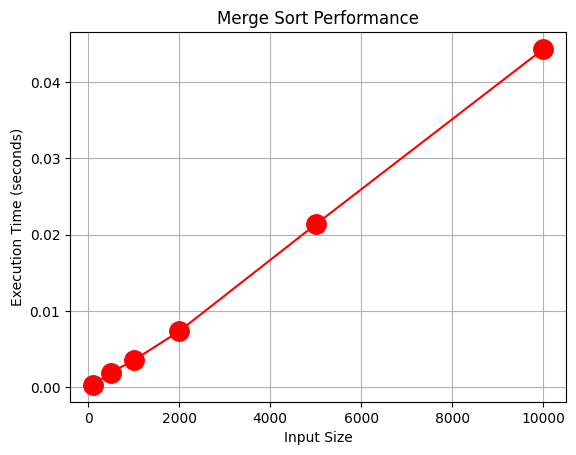

In [6]:
def ms_analyze_time(input_sizes):
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]
        global mergesort_swaps, mergesort_comparisons
        start_time = time.perf_counter()
        mergesort(arr, 0, len(arr) - 1)
        swaplist.append(mergesort_swaps)
        comparelist.append(mergesort_comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
    Total_execution[0] = execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    # print(f"Number of Swaps: {swaps}")
    # print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[1] = swaplist
    Compare[1] = comparelist
    space[1] = space_used
    return execution_times
    

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = ms_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Merge Sort Performance')
plt.grid(True)
plt.show()

MODIFIED MERGE SORT

In [13]:
def merge(A, p, q, r):
    size_low = q - p + 1
    size_high = r - q

    low = [0] * (size_low + 1)
    high = [0] * (size_high + 1)

    for i in range(size_low):
        low[i] = A[p + i]

    for j in range(size_high):
        high[j] = A[q + j + 1]

    low[size_low] = float("inf")
    high[size_high] = float("inf")

    i = 0
    j = 0

    for k in range(p, r + 1):
        if low[i] <= high[j]:
            A[k] = low[i]
            i += 1

        else:
            A[k] = high[j]
            j += 1


def insertion_sort(array, low, high):
    for i in range(low + 1, high + 1):
        key = array[i]
        j = i - 1
        while j >= low and array[j] > key:
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = key


def merge_sort_MOD(array, low, high, threshold=10):
    
    #Sort the array in place using merge sort algorithm.

   #Optimized with insertion sort for small subarrays.
  
     
    if low < high:
        if high - low < threshold:
            insertion_sort(array, low, high)
        else:
            mid = (low + high) // 2
            merge_sort_MOD(array, low, mid)
            merge_sort_MOD(array, mid + 1, high)
            merge(array, low, mid, high)

In [10]:
def msMOD_analyze_time(input_sizes):
    execution_times = []
    swaplist = []
    comparelist = []
    space_used = []
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]
        global mergesort_swaps, mergesort_comparisons
        start_time = time.perf_counter()
        merge_sort_MOD(arr, 0, len(arr) - 1)
        swaplist.append(mergesort_swaps)
        comparelist.append(mergesort_comparisons)
        space_used.append(sys.getsizeof(arr) / (1024 * 1024))
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
    Total_execution[1] = execution_times
    print(f"Input Size: {size}")
    print(f"Execution Time: {end_time - start_time} seconds")
    # print(f"Number of Swaps: {swaps}")
    # print(f"Number of Comparisons: {comparisons}")
    print("-" * 30)
    swap[1] = swaplist
    Compare[1] = comparelist
    space[1] = space_used
    return execution_times

Input Size: 10000
Execution Time: 0.021903099986957386 seconds
------------------------------


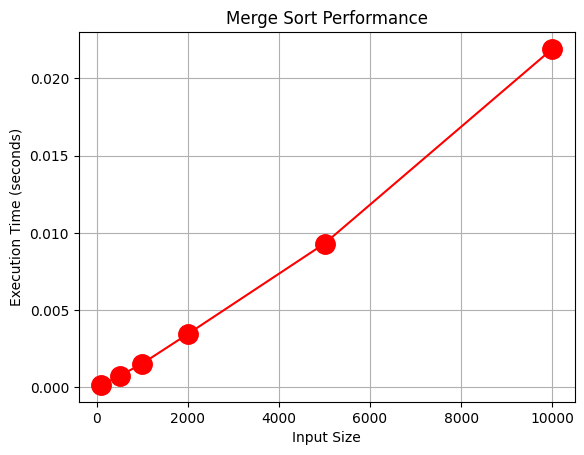

In [14]:

    

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = msMOD_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Merge Sort Performance')
plt.grid(True)
plt.show()

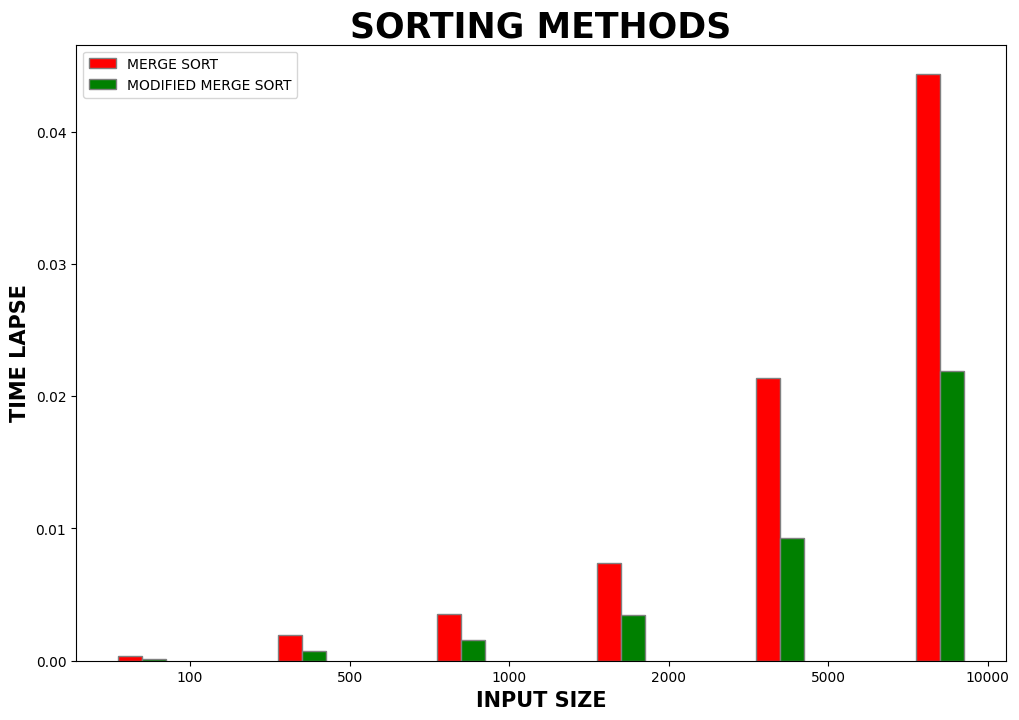

In [15]:
br1 = np.arange(len(Total_execution[0]))
barWidth = 0.15

# Adjust the x-positions for each set of bars to prevent overlapping
br2 = [x + barWidth for x in br1]


fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(br1, Total_execution[0], color='r', width=barWidth, edgecolor='grey', label='MERGE SORT')
plt.bar(br2, Total_execution[1], color='g', width=barWidth, edgecolor='grey', label='MODIFIED MERGE SORT')

plt.title('SORTING METHODS', fontweight='bold', fontsize=25)
plt.xlabel('INPUT SIZE', fontweight='bold', fontsize=15)
plt.ylabel('TIME LAPSE', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * 2.5 for r in range(len(Total_execution[0]))], [100, 500, 1000, 2000, 5000,10000])

plt.legend()
plt.show()





